# Initial Exploratory Data Analysis

The objective of my initial Exploratory Data Analysis (EDA) is to better understand the NeurIPS - Ariel Data Challenge 2025 and its data structure. The challenge categorizes the data files into three types: metadata, signal, and calibration. The metadata files provide key information about the star-planet systems and the signal data, which is critical for data processing. The signal files contain image data from the two optical instruments for each star-planet system, and the calibration files include supporting data to increase the signal-to-noise ratio during image processing. As such, my initial EDA follows a two-part structure. I first examine the seven metadata files, and then explore and visualize an example signal and the corresponding calibration files for one star-planet system.

In [1]:
!pip install --upgrade pandas seaborn --quiet > /dev/null 2>&1

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
palette = sns.color_palette('muted')

## I. Metadata Overview

### Load the 7 Metadata Files

In [2]:
path = '/kaggle/input/ariel-data-challenge-2025/'

df_adc_info = pd.read_csv(path + 'adc_info.csv')
df_axis_info = pd.read_parquet(path + 'axis_info.parquet')
df_sample_submission = pd.read_csv(path + 'sample_submission.csv')
df_test_star_info = pd.read_csv(path + 'test_star_info.csv')
df_train = pd.read_csv(path + 'train.csv')
df_train_star_info = pd.read_csv(path + 'train_star_info.csv')
df_wavelengths = pd.read_csv(path + 'wavelengths.csv')

### Dataset Dimensions

In [3]:
print('adc_info:', df_adc_info.shape)
print('axis_info:', df_axis_info.shape)
print('sample_submission:', df_sample_submission.shape)
print('test_star_info:', df_test_star_info.shape)
print('train:', df_train.shape)
print('train_star_info:', df_train_star_info.shape)
print('wavelengths:', df_wavelengths.shape)

adc_info: (1, 4)
axis_info: (135000, 4)
sample_submission: (1, 567)
test_star_info: (1, 9)
train: (1100, 284)
train_star_info: (1100, 9)
wavelengths: (1, 283)


4 of the 7 metadata files only have 1 row.

### Dataset Structures

#### adc_info
Analog-to-digital (ADC) conversion parameters (gain and offset) for restoring the original dynamic range of the data

In [4]:
df_adc_info.head()

,FGS1_adc_offset,FGS1_adc_gain,AIRS-CH0_adc_offset,AIRS-CH0_adc_gain
0,-1000.0,0.4369,-1000.0,0.4369


In [5]:
df_adc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FGS1_adc_offset      1 non-null      float64
 1   FGS1_adc_gain        1 non-null      float64
 2   AIRS-CH0_adc_offset  1 non-null      float64
 3   AIRS-CH0_adc_gain    1 non-null      float64
dtypes: float64(4)
memory usage: 164.0 bytes


#### axis_info
Axis information for both instruments (AIRS-CH0 and FGS1)

In [6]:
df_axis_info.head(3)

,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
0,0.000028,4.078463,0.1,0.000028
1,0.000056,4.074023,4.5,0.000056
2,0.001361,4.069568,0.1,0.000139


In [7]:
df_axis_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135000 entries, 0 to 134999
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AIRS-CH0-axis0-h           11250 non-null   float64
 1   AIRS-CH0-axis2-um          356 non-null     float64
 2   AIRS-CH0-integration_time  11250 non-null   float64
 3   FGS1-axis0-h               135000 non-null  float64
dtypes: float64(4)
memory usage: 4.1 MB


Note that the 3 AIRS-CH0 fields contain at most 11,250 non-null values, representing the 11,250 frames generated per observation for AIRS-CH0.

In [8]:
print('Count of nulls per column')
df_axis_info.isnull().sum()

Count of nulls per column


AIRS-CH0-axis0-h             123750
AIRS-CH0-axis2-um            134644
AIRS-CH0-integration_time    123750
FGS1-axis0-h                      0
dtype: int64

#### sample_submission
A sample submission in the correct format

In [9]:
df_sample_submission.head()

,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,sigma_274,sigma_275,sigma_276,sigma_277,sigma_278,sigma_279,sigma_280,sigma_281,sigma_282,sigma_283
0,1103775,0.456,0.456,0.456,0.456,0.456,0.456,0.456,0.456,0.456,...,0.456,0.456,0.456,0.456,0.456,0.456,0.456,0.456,0.456,0.456


In [10]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 567 entries, planet_id to sigma_283
dtypes: float64(566), int64(1)
memory usage: 4.6 KB


The submission file should contain 1,100 rows and 567 columns. There is one row for each of the 1,100 `planet_id` values. Each row will contain the `planet_id`, in addition to 283 spectrum columns and 283 uncertainty columns, resulting in 1 + 283 + 283 = 567 total columns.

#### test_star_info

In [11]:
df_test_star_info.head()

,planet_id,Rs,Ms,Ts,Mp,e,P,sma,i
0,1103775.0,0.965432,0.9591,5539.03037,1.665007,0.0,6.932871,15.43293,89.533139


In [12]:
df_test_star_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   planet_id  1 non-null      float64
 1   Rs         1 non-null      float64
 2   Ms         1 non-null      float64
 3   Ts         1 non-null      float64
 4   Mp         1 non-null      float64
 5   e          1 non-null      float64
 6   P          1 non-null      float64
 7   sma        1 non-null      float64
 8   i          1 non-null      float64
dtypes: float64(9)
memory usage: 204.0 bytes


#### train
Ground truth spectra

In [13]:
df_train.head(3)

,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,34983,0.018291,0.018088,0.018087,0.018085,0.018084,0.018084,0.018084,0.018084,0.018085,...,0.018109,0.018112,0.018118,0.018123,0.018125,0.018127,0.018130,0.018134,0.018138,0.018142
1,1873185,0.006347,0.006343,0.006343,0.006343,0.006343,0.006343,0.006343,0.006342,0.006342,...,0.006340,0.006340,0.006339,0.006339,0.006339,0.006339,0.006339,0.006339,0.006339,0.006339
2,3849793,0.046061,0.046139,0.046130,0.046117,0.046107,0.046105,0.046109,0.046112,0.046111,...,0.046144,0.046133,0.046131,0.046138,0.046141,0.046147,0.046147,0.046139,0.046134,0.046133


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 284 entries, planet_id to wl_283
dtypes: float64(283), int64(1)
memory usage: 2.4 MB


#### train_star_info

In [15]:
df_train_star_info.head(3)

,planet_id,Rs,Ms,Ts,Mp,e,P,sma,i
0,34983,1.155435,1.062961,5577.006645,0.694946,0.0,3.305589,8.550786,89.150759
1,1873185,1.813230,1.370451,6216.229756,0.610845,0.0,6.352660,9.553384,88.701514
2,3849793,0.653807,0.667352,4968.477186,1.529200,0.0,5.522798,15.285661,89.134177


In [16]:
df_train_star_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   planet_id  1100 non-null   int64  
 1   Rs         1100 non-null   float64
 2   Ms         1100 non-null   float64
 3   Ts         1100 non-null   float64
 4   Mp         1100 non-null   float64
 5   e          1100 non-null   float64
 6   P          1100 non-null   float64
 7   sma        1100 non-null   float64
 8   i          1100 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 77.5 KB


In [17]:
print(f"There are {df_train_star_info['planet_id'].nunique()} unique planet_id values.")

There are 1100 unique planet_id values.


#### wavelengths
The wavelength grid for each ground truth spectrum in the dataset

In [18]:
df_wavelengths.head()

,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,wl_10,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,0.7,1.951761,1.960612,1.96945,1.978273,1.987083,1.995879,2.004661,2.01343,2.022184,...,3.84972,3.85481,3.859887,3.86495,3.869999,3.875034,3.880055,3.885063,3.890056,3.895036


In [19]:
df_wavelengths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 283 entries, wl_1 to wl_283
dtypes: float64(283)
memory usage: 2.3 KB


### Summary of Star-Planet System Variables in train_star_info

#### Descriptive Statistics

In [20]:
df_train_star_info.describe()

,planet_id,Rs,Ms,Ts,Mp,e,P,sma,i
count,1.100000e+03,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000
mean,2.120064e+09,1.254358,1.089064,5839.469469,1.572862,0.0,5.190453,10.829223,88.460437
std,1.248891e+09,0.346594,0.208794,511.607940,2.261016,0.0,1.407455,3.034166,0.983465
min,3.498300e+04,0.653807,0.599486,4235.958255,0.049275,0.0,2.781548,4.231352,85.566474
25%,1.056146e+09,0.966195,0.936751,5571.158850,0.586763,0.0,3.947215,8.652818,87.710388
50%,2.070516e+09,1.231279,1.097024,5887.408638,0.936075,0.0,5.200545,10.537554,88.505820
75%,3.220500e+09,1.447491,1.247343,6230.380350,1.646159,0.0,6.343532,12.794059,89.253489
max,4.294093e+09,2.887034,1.817730,6979.092801,24.693157,0.0,7.613688,20.948992,90.000000


The orbital eccentricity, `e`, is 0 for all star-planet systems.

#### Variable Definitions

1. `planet_id`: Unique identifier for the star-planet system
2. `Rs`: Stellar radius in solar radii (R☉)
3. `Ms`: Stellar mass in solar masses (M☉)
4. `Ts`: Stellar effective temperature in Kelvin (K)
5. `Mp`: Planetary mass in Earth masses (M⊕)
6. `e`: Orbital eccentricity (dimensionless)
7. `P`: Orbital period in days
8. `sma`: Semi-major axis in stellar radii (Rs), showing the orbital distance relative to the stellar radii
9. `i`: Orbital inclination in degrees

#### Histograms

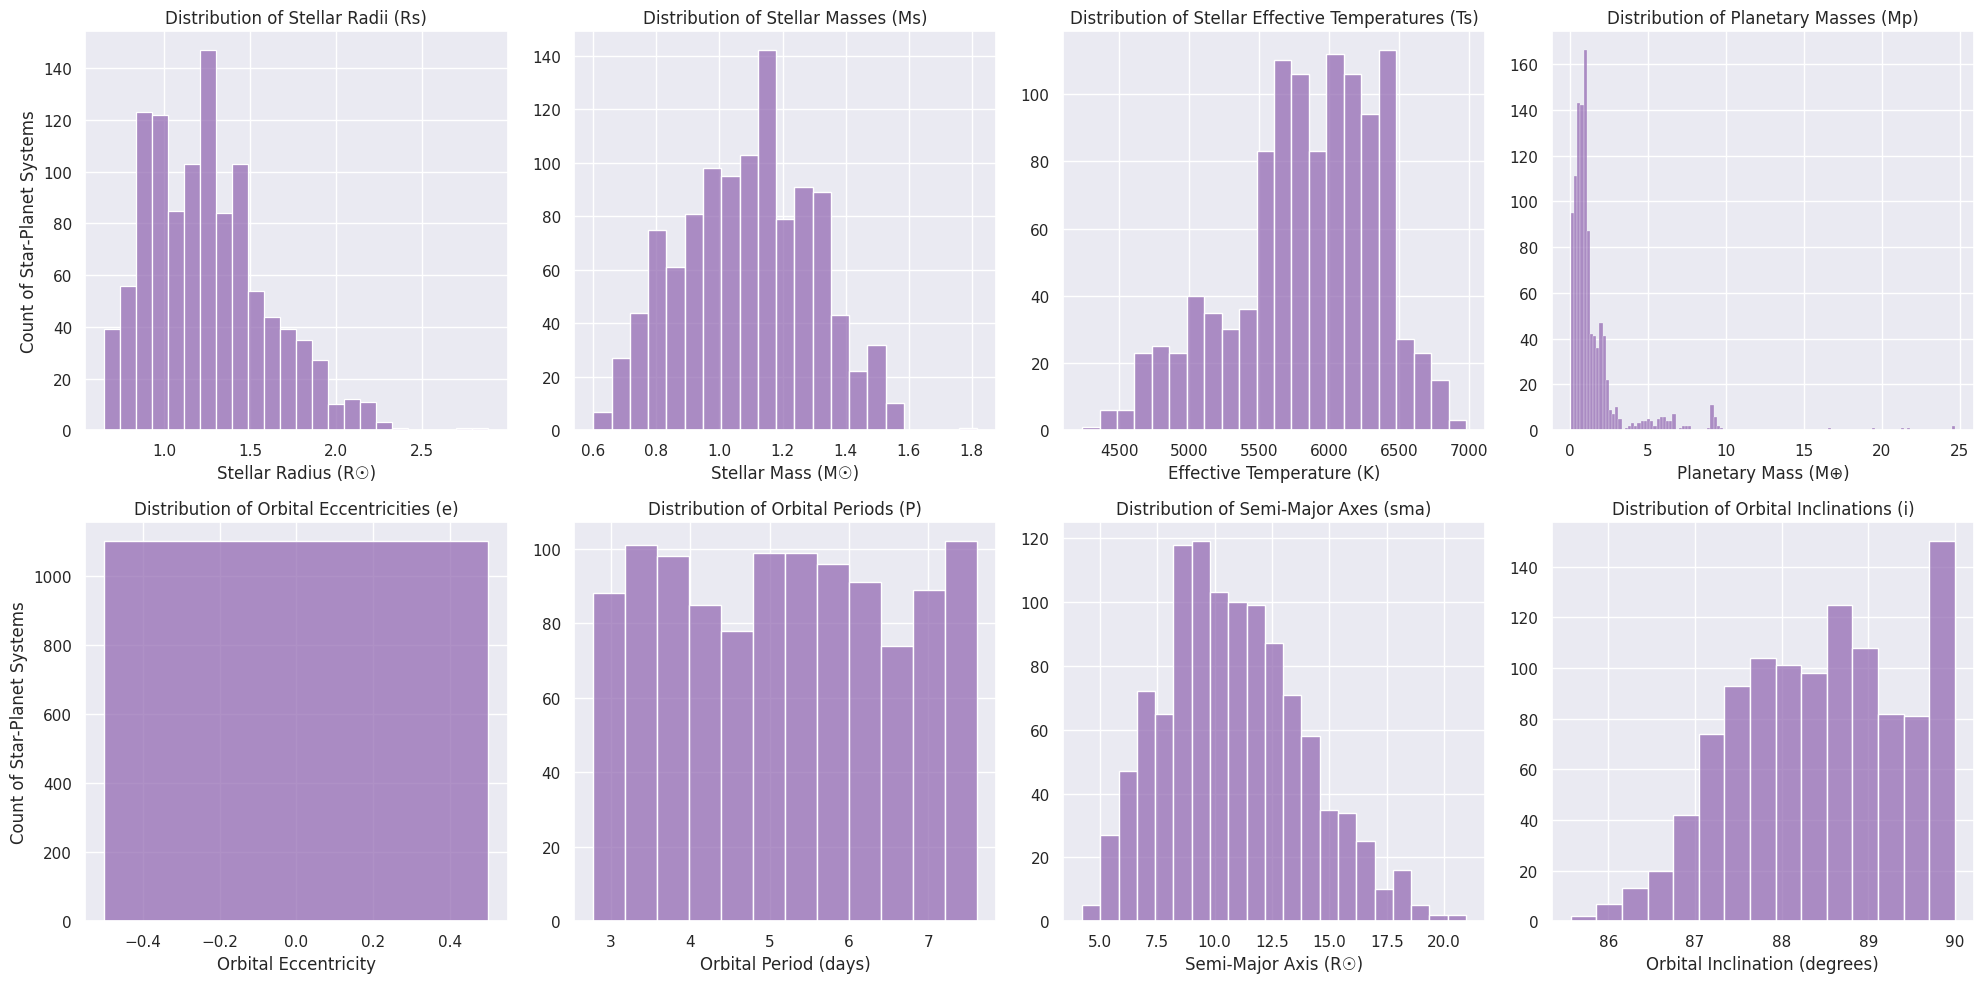

In [21]:
rows = 2
cols_per_row = 4
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows), sharey=False)

columns = df_train_star_info.iloc[:, 1:].columns
titles = [
    'Stellar Radii (Rs)',
    'Stellar Masses (Ms)',
    'Stellar Effective Temperatures (Ts)',
    'Planetary Masses (Mp)',
    'Orbital Eccentricities (e)',
    'Orbital Periods (P)',
    'Semi-Major Axes (sma)',
    'Orbital Inclinations (i)'
]
xlabels = [
    'Stellar Radius (R☉)',
    'Stellar Mass (M☉)',
    'Effective Temperature (K)',
    'Planetary Mass (M⊕)',
    'Orbital Eccentricity',
    'Orbital Period (days)',
    'Semi-Major Axis (R☉)',
    'Orbital Inclination (degrees)'
]

num_cols = len(columns)
axes = axes.flatten() if rows > 1 else [axes] if num_cols == 1 else axes

for i, column in enumerate(df_train_star_info.iloc[:, 1:].columns):
    sns.histplot(df_train_star_info[column], ax=axes[i], color=palette[4])
    axes[i].set_title('Distribution of ' + titles[i])
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel('')

axes[0].set_ylabel('Count of Star-Planet Systems')
axes[4].set_ylabel('Count of Star-Planet Systems')

plt.tight_layout()
plt.show()

#### Cumulative Distribution Functions (CDFs)

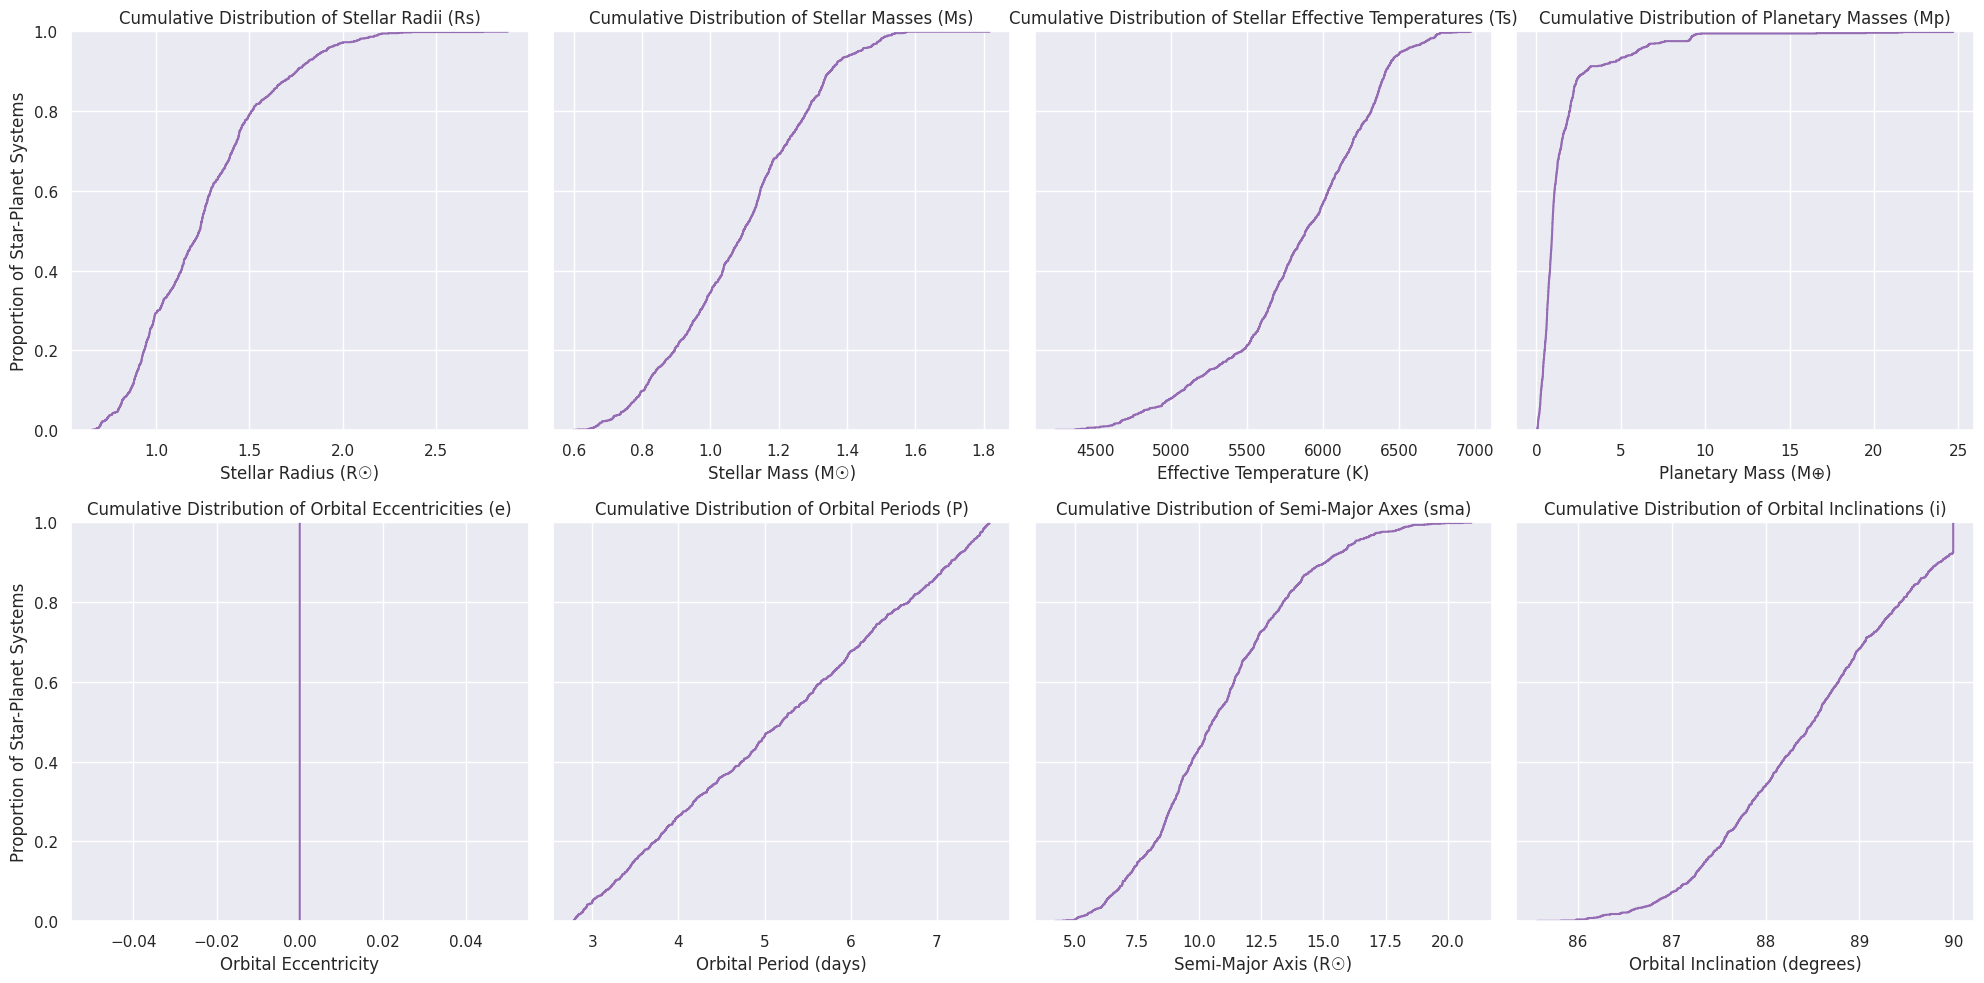

In [22]:
rows = 2
cols_per_row = 4
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows), sharey=True)

num_cols = len(df_train_star_info.iloc[:, 1:].columns)
axes = axes.flatten() if rows > 1 else [axes] if num_cols == 1 else axes

for i, column in enumerate(columns):
    sns.ecdfplot(df_train_star_info[column], ax=axes[i], color=palette[4])
    axes[i].set_title('Cumulative Distribution of ' + titles[i])
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel('')

axes[0].set_ylabel('Proportion of Star-Planet Systems')
axes[4].set_ylabel('Proportion of Star-Planet Systems')

plt.tight_layout()
plt.show()

#### Box Plots

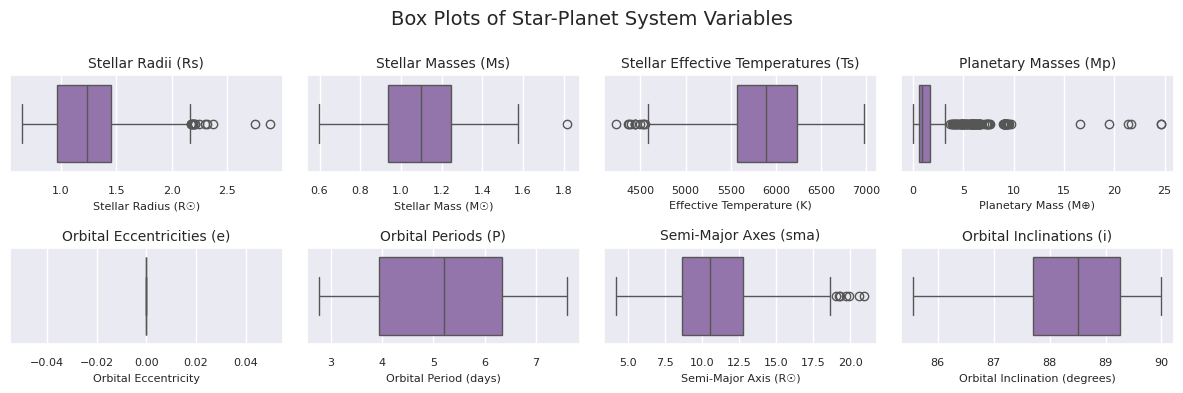

In [23]:
rows = 2
cols_per_row = 4
fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, 4), sharey=False)

fig.suptitle('Box Plots of Star-Planet System Variables', fontsize=14)

axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes): 
        sns.boxplot(x=df_train_star_info[column], ax=axes[i], orient="h", color=palette[4])
        axes[i].set_title(titles[i], fontsize=10)
        axes[i].set_xlabel(xlabels[i], fontsize=8)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=8) 

plt.tight_layout()
plt.show()

#### Scatterplots

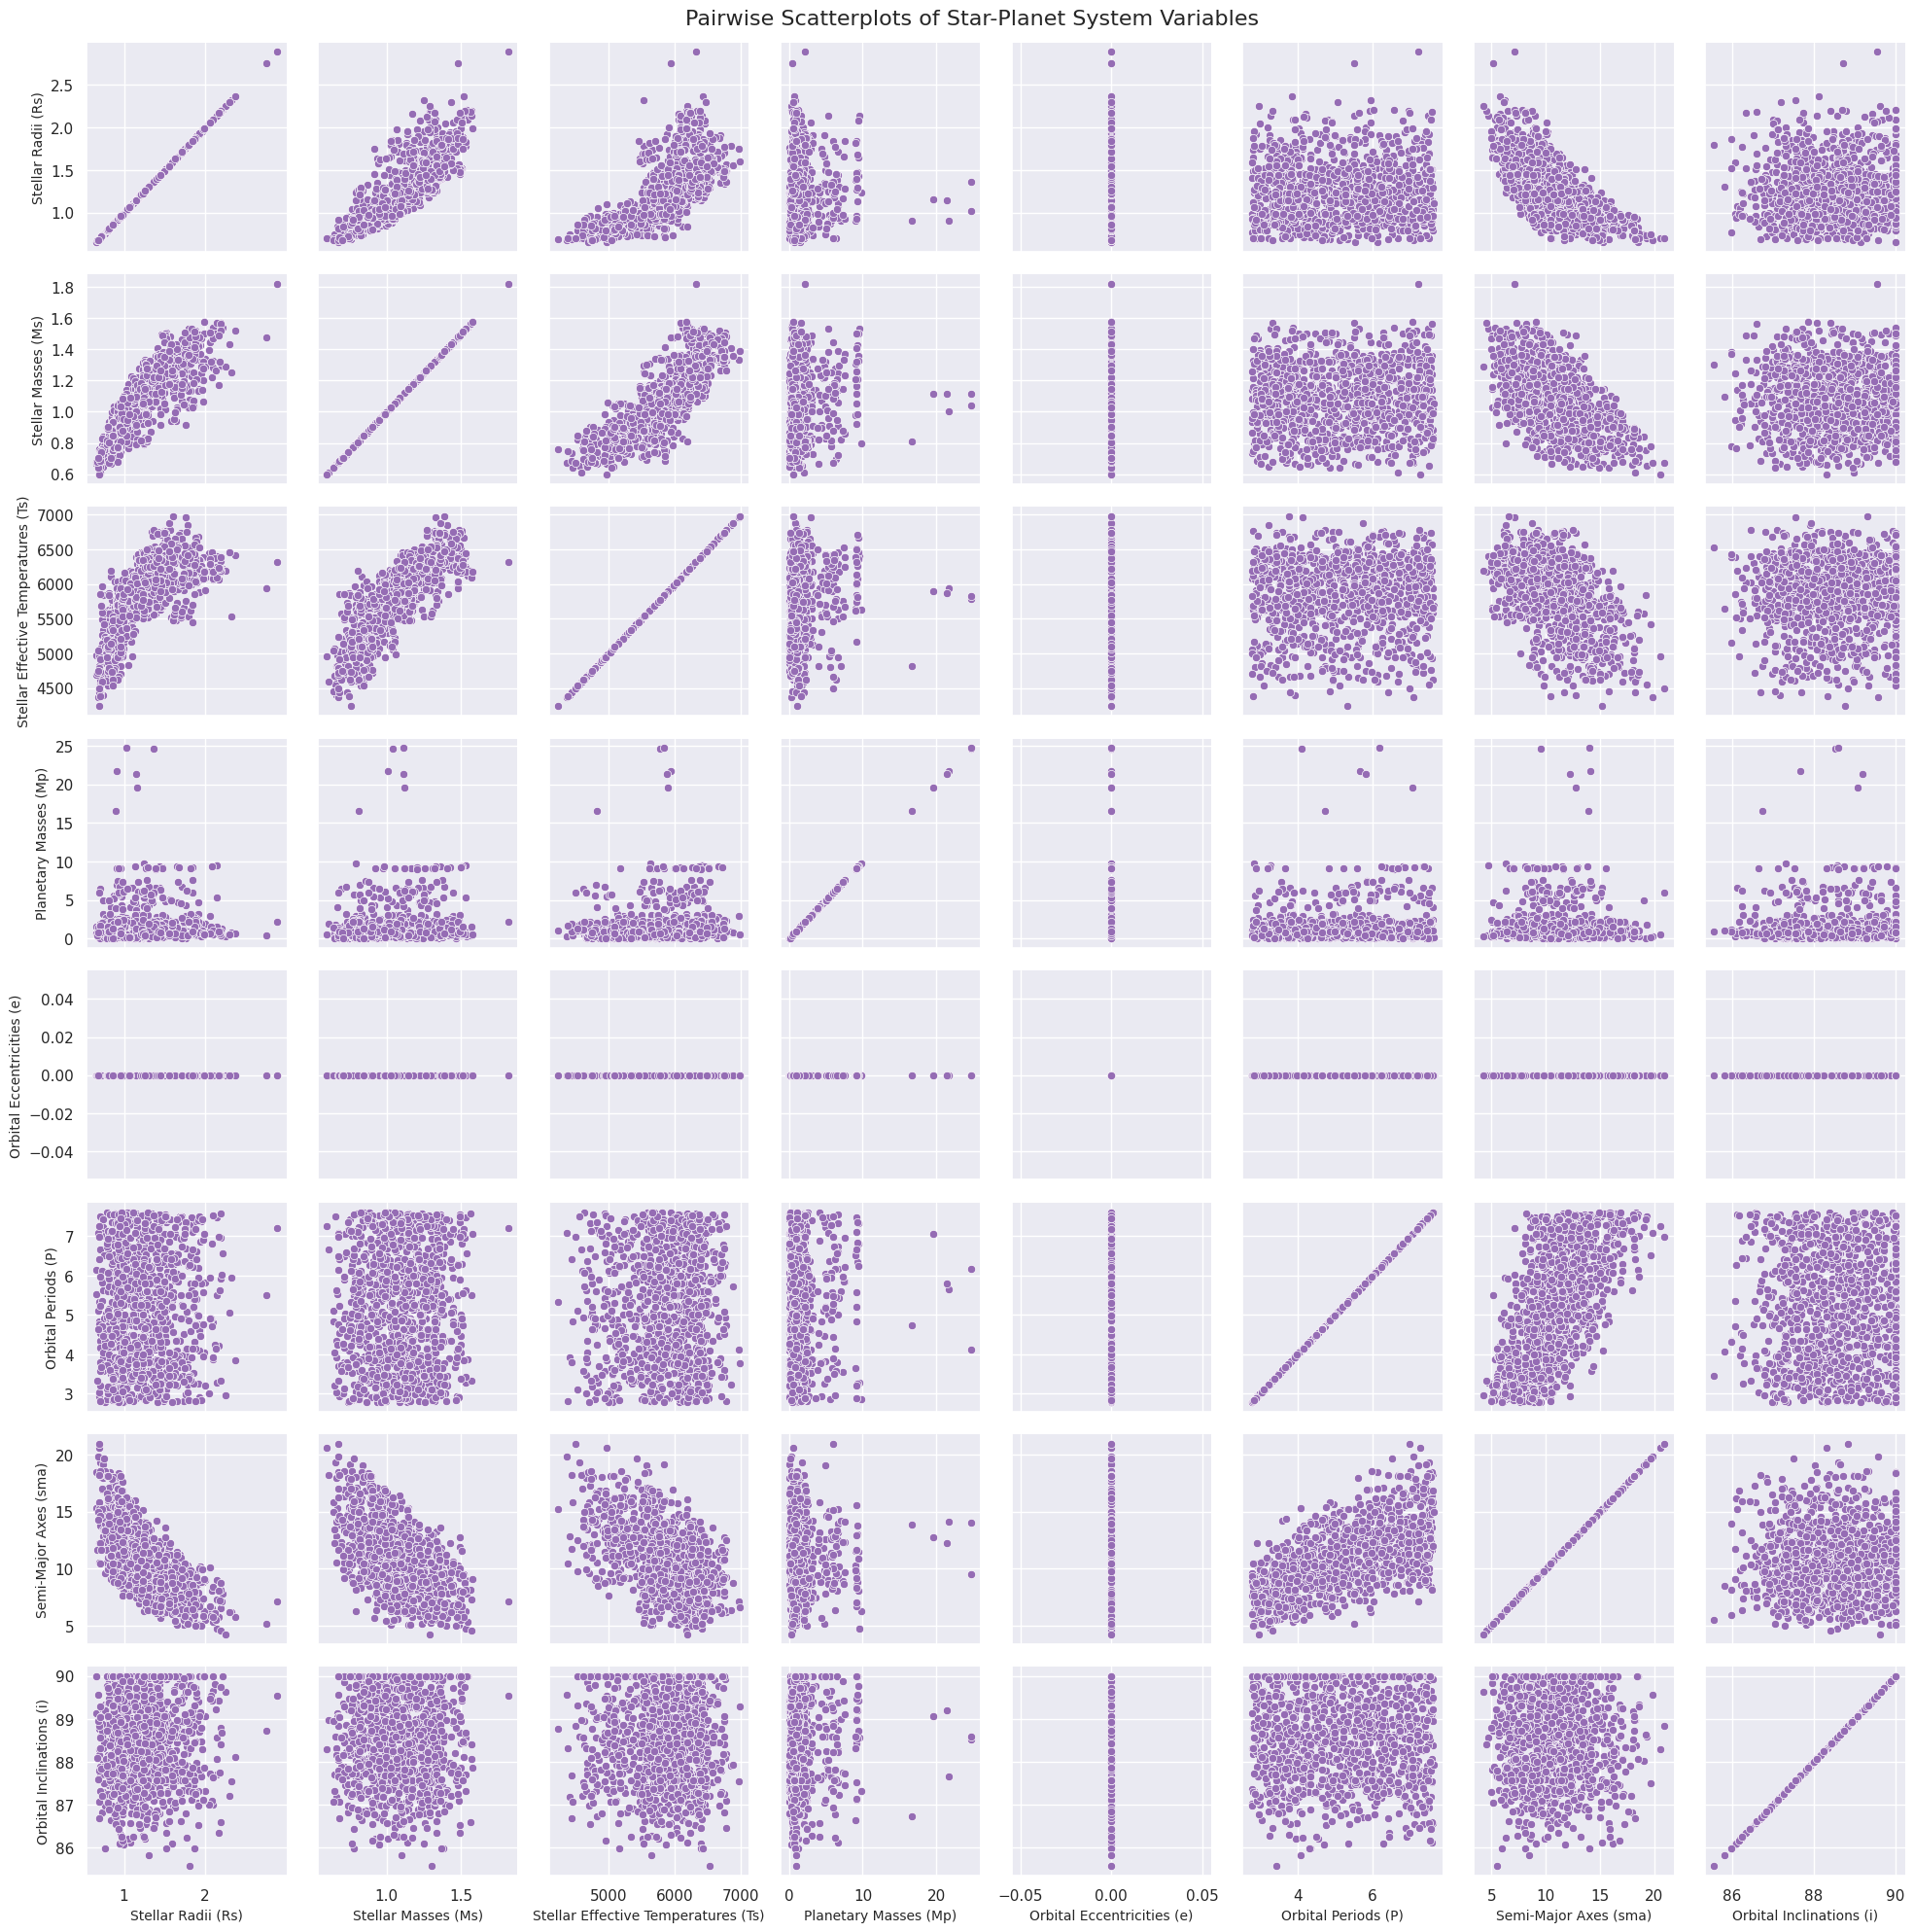

In [24]:
g = sns.PairGrid(df_train_star_info.iloc[:, 1:])
g.map(sns.scatterplot, color=palette[4])
g.figure.suptitle('Pairwise Scatterplots of Star-Planet System Variables', y=1, fontsize=16)

axes_labels = dict(zip(columns, titles))

for i, ax in enumerate(g.axes.flat):
    x_var = g.x_vars[ax.get_subplotspec().colspan.start]
    y_var = g.y_vars[ax.get_subplotspec().rowspan.start]
    
    ax.set_xlabel(axes_labels[x_var], fontsize=10)
    ax.set_ylabel(axes_labels[y_var], fontsize=10)

plt.show()

## II. Signal and Calibration Data Overview

### Load Data for a Star-Planet System

In [25]:
# Select a random planet_id
planet_id = df_train_star_info['planet_id'].sample(n=1, random_state=42).iloc[0]
print(planet_id)

1266154112


#### Signal Files

In [26]:
path_train = path + 'train/' + str(planet_id) + '/'

df_airs_signal = pd.read_parquet(path_train + 'AIRS-CH0_signal_0.parquet')
df_fgs1_signal = pd.read_parquet(path_train + 'FGS1_signal_0.parquet')

#### Calibration Files

In [27]:
path_train_airs = path_train + 'AIRS-CH0_calibration_0/'
path_train_fgs1 = path_train + 'FGS1_calibration_0/'

calib = ['dark', 'dead', 'flat', 'linear_corr', 'read']

df_airs_dark = pd.read_parquet(path_train_airs + calib[0] + '.parquet')
df_airs_dead = pd.read_parquet(path_train_airs + calib[1] + '.parquet')
df_airs_flat = pd.read_parquet(path_train_airs + calib[2] + '.parquet')
df_airs_linear_corr = pd.read_parquet(path_train_airs + calib[3] + '.parquet')
df_airs_read = pd.read_parquet(path_train_airs + calib[4] + '.parquet')

df_fgs1_dark = pd.read_parquet(path_train_fgs1 + calib[0] + '.parquet')
df_fgs1_dead = pd.read_parquet(path_train_fgs1 + calib[1] + '.parquet')
df_fgs1_flat = pd.read_parquet(path_train_fgs1 + calib[2] + '.parquet')
df_fgs1_linear_corr = pd.read_parquet(path_train_fgs1 + calib[3] + '.parquet')
df_fgs1_read = pd.read_parquet(path_train_fgs1 + calib[4] + '.parquet')

There are 5 calibration files per signal file: dark, dead, flat, linear_corr, and read. These represent dark frames, dead or hot pixels, flat field frames, linearity correction of the sensor, and read noise frames, respectively.

### Dataset Dimensions

In [28]:
print('AIRS-CH0')
print('Signal:', df_airs_signal.shape)
print('Calibration - dark:', df_airs_dark.shape)
print('Calibration - dead:', df_airs_dead.shape)
print('Calibration - flat:', df_airs_flat.shape)
print('Calibration - linear_corr:', df_airs_linear_corr.shape)
print('Calibration - read:', df_airs_read.shape)

print('\nFGS1')
print('Signal:', df_fgs1_signal.shape)
print('Calibration - dark:', df_fgs1_dark.shape)
print('Calibration - dead:', df_fgs1_dead.shape)
print('Calibration - flat:', df_fgs1_flat.shape)
print('Calibration - linear_corr:', df_fgs1_linear_corr.shape)
print('Calibration - read:', df_fgs1_read.shape)

AIRS-CH0
Signal: (11250, 11392)
Calibration - dark: (32, 356)
Calibration - dead: (32, 356)
Calibration - flat: (32, 356)
Calibration - linear_corr: (192, 356)
Calibration - read: (32, 356)

FGS1
Signal: (135000, 1024)
Calibration - dark: (32, 32)
Calibration - dead: (32, 32)
Calibration - flat: (32, 32)
Calibration - linear_corr: (192, 32)
Calibration - read: (32, 32)


### Dataset Structures

#### Signal

##### AIRS-CH0

Each signal file from AIRS-CH0 contains 11,250 rows of images captured at constant time steps. Each 32 x 356 image has been flattened into 11,392 columns. The metadata file *axis_info.parquet* contains more detail on the time steps.

In [29]:
df_airs_signal.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_11382,column_11383,column_11384,column_11385,column_11386,column_11387,column_11388,column_11389,column_11390,column_11391
0,425,430,441,439,442,442,430,447,446,442,...,456,440,433,432,434,444,439,434,432,428
1,444,439,437,441,427,440,444,438,440,433,...,446,435,434,456,430,431,446,440,437,430
2,432,431,424,440,443,438,427,433,431,438,...,434,456,436,434,425,434,446,434,442,439


In [30]:
df_airs_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Columns: 11392 entries, column_0 to column_11391
dtypes: uint16(11392)
memory usage: 244.4 MB


In [31]:
print('Count of null values in AIRS-CH0 signal example file:', df_airs_signal.isnull().sum().sum())

Count of null values in AIRS-CH0 signal example file: 0


##### FGS1

Each signal file from FGS1 contains 135,000 rows of images captured at 0.1 second time steps. Each 32 x 32 image has been flattened into 1,024 columns.

In [32]:
df_fgs1_signal.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_1014,column_1015,column_1016,column_1017,column_1018,column_1019,column_1020,column_1021,column_1022,column_1023
0,442,440,439,432,435,440,444,437,440,442,...,451,433,442,449,427,444,446,437,434,438
1,442,446,443,449,436,434,438,437,448,434,...,433,435,442,433,444,439,425,431,438,426
2,441,432,438,429,443,433,431,439,433,442,...,437,431,432,434,443,449,468,441,441,437


In [33]:
df_fgs1_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135000 entries, 0 to 134999
Columns: 1024 entries, column_0 to column_1023
dtypes: uint16(1024)
memory usage: 263.7 MB


In [34]:
print('Count of null values in FGS1 signal example file:', df_fgs1_signal.isnull().sum().sum())

Count of null values in FGS1 signal example file: 0


#### Calibration

##### AIRS-CH0

Dark Frames

In [35]:
df_airs_dark.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_346,column_347,column_348,column_349,column_350,column_351,column_352,column_353,column_354,column_355
0,0.006198,0.007023,0.004158,0.006793,0.006963,0.003843,0.006790,0.006716,0.008149,0.004132,...,0.008437,0.007557,0.006089,0.007018,0.008246,0.004892,0.004652,0.007735,0.009204,0.008163
1,0.006579,0.006494,0.006610,0.007079,0.006898,0.006661,0.009776,0.007895,0.006145,0.006578,...,0.003092,0.009015,0.005232,0.004017,0.007434,0.006993,0.008005,0.008543,0.009356,0.008002
2,0.007104,0.007160,0.008412,0.005316,0.007737,0.005302,0.006919,0.007561,0.007984,0.005085,...,0.006908,0.006177,0.007003,0.009071,0.007641,0.008314,0.005041,0.009291,0.007623,0.010126


In [36]:
df_airs_dark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 356 entries, column_0 to column_355
dtypes: float64(356)
memory usage: 89.1 KB


Dead or Hot Pixels

In [37]:
df_airs_dead.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_346,column_347,column_348,column_349,column_350,column_351,column_352,column_353,column_354,column_355
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df_airs_dead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 356 entries, column_0 to column_355
dtypes: bool(356)
memory usage: 11.3 KB


In [39]:
print('Count of True values in df_airs_dead:', df_airs_dead.sum().sum())

Count of True values in df_airs_dead: 21


Flat Field Frames

In [40]:
df_airs_flat.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_346,column_347,column_348,column_349,column_350,column_351,column_352,column_353,column_354,column_355
0,0.955177,0.978949,0.986810,0.987477,0.996003,1.002331,0.962801,0.970969,0.974009,0.990741,...,1.005553,0.958175,0.992329,0.962308,0.987843,0.974761,0.978236,0.979757,0.963988,0.990592
1,0.986751,0.989249,0.970498,0.975337,0.968770,0.973713,0.982018,0.978912,0.986602,0.963878,...,0.993826,0.972255,0.976573,0.974470,0.976913,0.990063,0.970314,0.991773,0.977145,0.969430
2,0.981669,0.983234,0.983896,0.971212,0.973099,0.982035,0.982613,0.948069,0.965920,0.967528,...,0.974550,0.949619,0.968062,0.967505,0.968987,0.967192,0.965590,0.968182,0.983389,0.986790


In [41]:
df_airs_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 356 entries, column_0 to column_355
dtypes: float64(356)
memory usage: 89.1 KB


Linearity Correction of the Sensor

In [42]:
df_airs_linear_corr.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_346,column_347,column_348,column_349,column_350,column_351,column_352,column_353,column_354,column_355
0,0.246671,0.001150,0.040335,0.246961,0.226076,0.101134,0.156239,0.336584,-0.197660,0.227338,...,0.037430,-0.212051,0.151795,0.018205,0.175876,-0.016370,0.445831,0.058710,-0.359802,0.202769
1,0.058194,-0.115859,0.105178,0.301012,0.271514,0.123169,0.217246,0.235886,0.337063,0.005245,...,0.351514,0.113052,0.148721,0.259588,0.275866,0.042128,0.166771,0.025628,-0.016889,0.278795
2,0.137698,0.152059,0.116838,-0.042125,0.436062,-0.022615,0.128578,-0.188718,0.093558,0.356372,...,0.084845,0.071824,0.005225,0.428290,0.184602,-0.005364,0.132332,0.052872,-0.021174,0.601108


In [43]:
df_airs_linear_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 356 entries, column_0 to column_355
dtypes: float64(356)
memory usage: 534.1 KB


Read Noise Frames

In [44]:
df_airs_read.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_346,column_347,column_348,column_349,column_350,column_351,column_352,column_353,column_354,column_355
0,12.930635,12.750655,12.927281,13.735460,17.377603,14.267877,15.834496,13.207151,12.428067,12.369191,...,13.419492,12.263637,13.031285,12.814011,12.422203,13.440373,12.591208,16.895906,15.730548,12.904595
1,11.882003,13.296217,12.141436,12.173400,12.970580,12.672530,12.453942,12.639382,12.527869,12.350445,...,16.844787,12.484266,12.695969,15.377662,18.264446,12.782299,13.012147,12.806587,12.761600,12.325468
2,13.002502,12.354278,22.488035,16.392004,12.583746,13.106127,13.037720,12.643243,18.859749,14.895104,...,12.980656,14.132905,13.376874,12.517480,12.829224,13.331305,12.776601,13.679373,13.223495,13.692147


In [45]:
df_airs_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 356 entries, column_0 to column_355
dtypes: float64(356)
memory usage: 89.1 KB


##### FGS1

Dark Frames

In [46]:
df_fgs1_dark.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31
0,0.008016,0.009674,0.007844,0.006347,0.007748,0.006259,0.005075,0.006683,0.008328,0.009985,...,0.006839,0.007349,0.004809,0.006460,0.005222,0.005634,0.007815,0.002245,0.005064,0.006818
1,0.005852,0.006457,0.008009,0.002367,0.004773,0.007592,0.006984,0.008620,0.006316,0.009152,...,0.007301,0.007325,0.007197,0.008704,0.005239,0.005760,0.004782,0.006732,0.006794,0.009333
2,0.006654,0.008068,0.006144,0.007315,0.006857,0.007433,0.007816,0.009068,0.008099,0.009870,...,0.006800,0.006977,0.007683,0.005743,0.004556,0.007111,0.005605,0.006326,0.006373,0.005814


In [47]:
df_fgs1_dark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_0   32 non-null     float64
 1   column_1   32 non-null     float64
 2   column_2   32 non-null     float64
 3   column_3   32 non-null     float64
 4   column_4   32 non-null     float64
 5   column_5   32 non-null     float64
 6   column_6   32 non-null     float64
 7   column_7   32 non-null     float64
 8   column_8   32 non-null     float64
 9   column_9   32 non-null     float64
 10  column_10  32 non-null     float64
 11  column_11  32 non-null     float64
 12  column_12  32 non-null     float64
 13  column_13  32 non-null     float64
 14  column_14  32 non-null     float64
 15  column_15  32 non-null     float64
 16  column_16  32 non-null     float64
 17  column_17  32 non-null     float64
 18  column_18  32 non-null     float64
 19  column_19  32 non-null     float64
 20  column_20  3

Dead or Hot Pixels

In [48]:
df_fgs1_dead.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df_fgs1_dead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   column_0   32 non-null     bool 
 1   column_1   32 non-null     bool 
 2   column_2   32 non-null     bool 
 3   column_3   32 non-null     bool 
 4   column_4   32 non-null     bool 
 5   column_5   32 non-null     bool 
 6   column_6   32 non-null     bool 
 7   column_7   32 non-null     bool 
 8   column_8   32 non-null     bool 
 9   column_9   32 non-null     bool 
 10  column_10  32 non-null     bool 
 11  column_11  32 non-null     bool 
 12  column_12  32 non-null     bool 
 13  column_13  32 non-null     bool 
 14  column_14  32 non-null     bool 
 15  column_15  32 non-null     bool 
 16  column_16  32 non-null     bool 
 17  column_17  32 non-null     bool 
 18  column_18  32 non-null     bool 
 19  column_19  32 non-null     bool 
 20  column_20  32 non-null     bool 
 21  column_21  32 non-

In [50]:
print('Count of True values in df_fgs1_dead:', df_fgs1_dead.sum().sum())

Count of True values in df_fgs1_dead: 2


Flat Field Frames

In [51]:
df_fgs1_flat.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31
0,1.046038,1.016853,1.024550,1.020213,1.029913,1.022309,1.037673,1.026642,1.016772,1.027511,...,1.034056,0.999141,1.015308,1.004072,1.030689,1.021552,1.025694,1.016214,1.041941,1.041911
1,1.004191,1.020599,1.025879,1.016241,0.998333,1.018706,1.031209,1.006501,1.019990,1.036890,...,1.019137,1.026625,1.038362,1.060550,1.032435,1.026479,1.037464,1.009639,1.034983,1.011368
2,1.021018,1.031398,1.021674,1.029685,1.032349,1.017059,1.026461,1.031152,1.019549,1.006569,...,1.049931,1.035649,1.012660,1.038135,1.022833,1.018142,1.021858,1.037079,1.028000,1.023797


In [52]:
df_fgs1_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_0   32 non-null     float64
 1   column_1   32 non-null     float64
 2   column_2   32 non-null     float64
 3   column_3   32 non-null     float64
 4   column_4   32 non-null     float64
 5   column_5   32 non-null     float64
 6   column_6   32 non-null     float64
 7   column_7   32 non-null     float64
 8   column_8   32 non-null     float64
 9   column_9   32 non-null     float64
 10  column_10  32 non-null     float64
 11  column_11  32 non-null     float64
 12  column_12  32 non-null     float64
 13  column_13  32 non-null     float64
 14  column_14  32 non-null     float64
 15  column_15  32 non-null     float64
 16  column_16  32 non-null     float64
 17  column_17  32 non-null     float64
 18  column_18  32 non-null     float64
 19  column_19  32 non-null     float64
 20  column_20  3

Linearity Correction of the Sensor

In [53]:
df_fgs1_linear_corr.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31
0,0.322805,0.248533,0.097094,0.402380,0.497230,0.117681,0.273785,0.191935,0.266681,0.414894,...,0.504057,0.330767,0.122873,0.338592,0.285565,0.106149,0.206552,0.207408,0.137544,0.381238
1,0.072684,0.256918,0.243488,0.226401,0.378390,0.275406,0.511280,0.165992,0.200871,0.228252,...,0.409848,0.503437,0.189129,0.217851,0.095790,0.249851,0.334826,0.160788,0.251649,0.372915
2,0.181524,0.161465,0.275357,0.243008,0.282758,0.131083,0.332578,0.212651,0.141717,0.288195,...,0.389632,0.134672,0.179034,0.174299,0.239780,0.378985,0.347675,0.354579,0.293841,0.159500


In [54]:
df_fgs1_linear_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_0   192 non-null    float64
 1   column_1   192 non-null    float64
 2   column_2   192 non-null    float64
 3   column_3   192 non-null    float64
 4   column_4   192 non-null    float64
 5   column_5   192 non-null    float64
 6   column_6   192 non-null    float64
 7   column_7   192 non-null    float64
 8   column_8   192 non-null    float64
 9   column_9   192 non-null    float64
 10  column_10  192 non-null    float64
 11  column_11  192 non-null    float64
 12  column_12  192 non-null    float64
 13  column_13  192 non-null    float64
 14  column_14  192 non-null    float64
 15  column_15  192 non-null    float64
 16  column_16  192 non-null    float64
 17  column_17  192 non-null    float64
 18  column_18  192 non-null    float64
 19  column_19  192 non-null    float64
 20  column_20 

Read Noise Frames

In [55]:
df_fgs1_read.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31
0,14.994785,12.461363,14.154490,22.753245,13.611653,12.235385,12.652074,12.504880,13.074017,12.620705,...,12.538509,13.928473,12.482518,12.134363,13.093263,12.276488,46.896933,12.516890,12.921954,12.328699
1,14.075590,17.122245,15.252015,16.424019,12.712957,12.991255,14.829059,13.840775,12.679295,13.368755,...,14.997341,12.834536,12.553259,12.444807,12.907609,12.565393,13.079940,12.427033,12.886606,12.658042
2,13.091126,12.250982,13.020142,12.492168,38.160376,12.773053,12.788492,26.329208,12.384066,12.407341,...,12.586999,12.238142,13.723002,12.355274,12.858083,12.881803,13.740133,12.806203,13.211876,12.355985


In [56]:
df_fgs1_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_0   32 non-null     float64
 1   column_1   32 non-null     float64
 2   column_2   32 non-null     float64
 3   column_3   32 non-null     float64
 4   column_4   32 non-null     float64
 5   column_5   32 non-null     float64
 6   column_6   32 non-null     float64
 7   column_7   32 non-null     float64
 8   column_8   32 non-null     float64
 9   column_9   32 non-null     float64
 10  column_10  32 non-null     float64
 11  column_11  32 non-null     float64
 12  column_12  32 non-null     float64
 13  column_13  32 non-null     float64
 14  column_14  32 non-null     float64
 15  column_15  32 non-null     float64
 16  column_16  32 non-null     float64
 17  column_17  32 non-null     float64
 18  column_18  32 non-null     float64
 19  column_19  32 non-null     float64
 20  column_20  3

### Signal and Calibration Visualizations

#### Raw Signal Data

##### AIRS-CH0

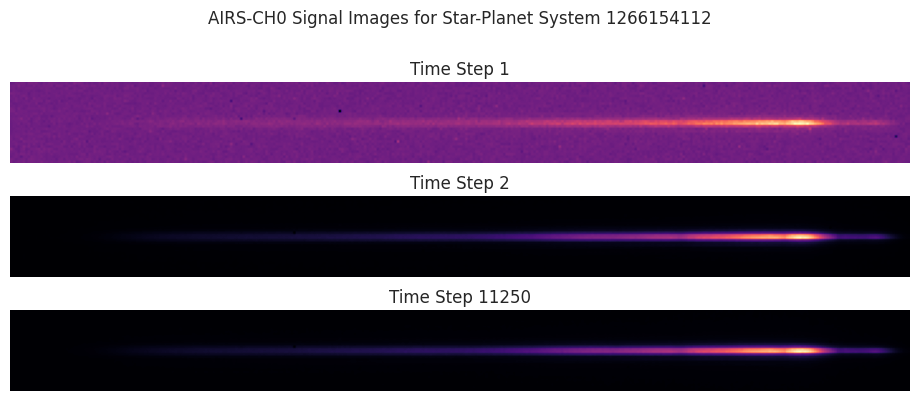

In [57]:
colormap = 'magma'
fig, axes = plt.subplots(3, 1, figsize=(12, 4))

time_steps = [0, 1, len(df_airs_signal) - 1]
images = [np.reshape(df_airs_signal.iloc[i], (32, 356)) for i in time_steps]

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img, cmap=colormap)
    ax.set_title(f'Time Step {time_steps[i] + 1}')
    i += 1
    ax.axis('off')

fig.suptitle('AIRS-CH0 Signal Images for Star-Planet System ' + str(planet_id), y=1, fontsize=12)

plt.tight_layout()
plt.show()

##### FGS1

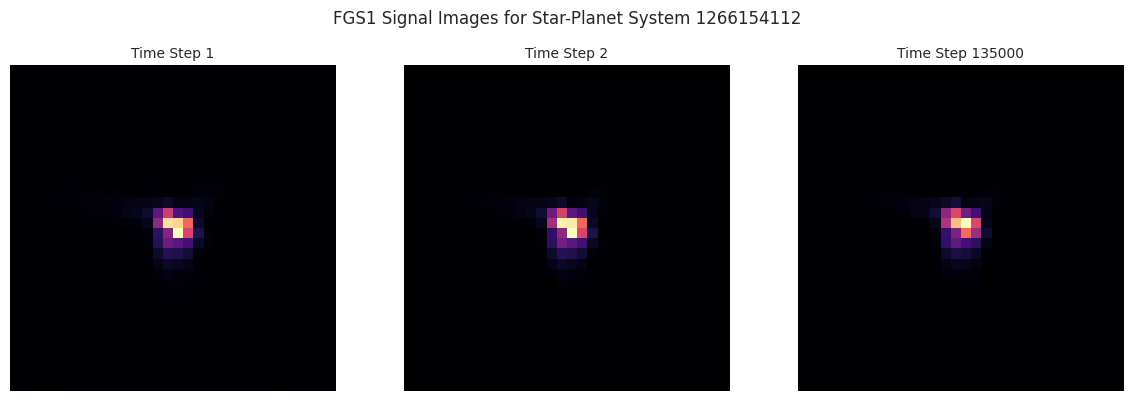

In [58]:
colormap = 'magma'
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

time_steps = [0, 1, len(df_fgs1_signal) - 1]
images = [np.reshape(df_fgs1_signal.iloc[i], (32, 32)) for i in time_steps]

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img, cmap=colormap)
    ax.set_title(f'Time Step {time_steps[i] + 1}', fontsize=10)
    i += 1
    ax.axis('off')

fig.suptitle('FGS1 Signal Images for Star-Planet System ' + str(planet_id), y=1, fontsize=12)

plt.tight_layout()
plt.show()

#### Calibration Data

##### AIRS-CH0

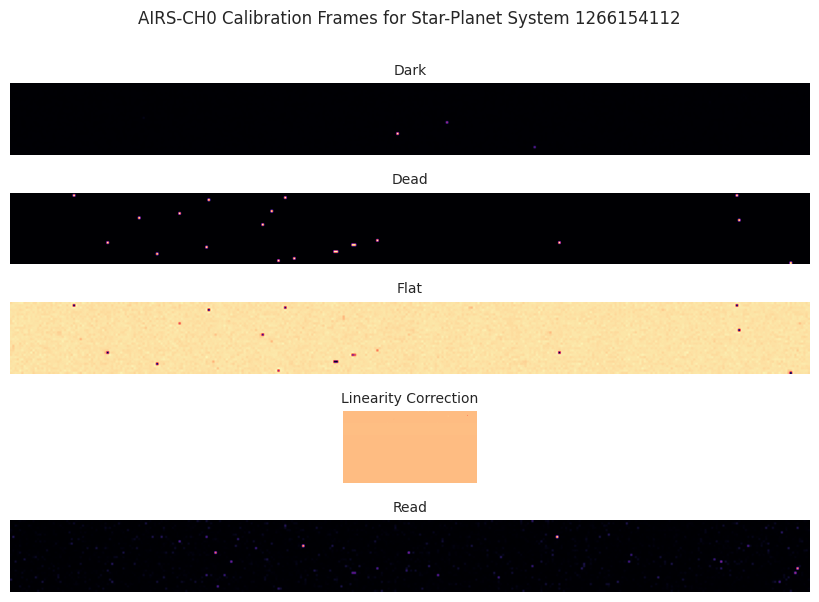

In [59]:
colormap = 'magma'
fig, axes = plt.subplots(5, 1, figsize=(12, 6))

titles = ['Dark', 'Dead', 'Flat', 'Linearity Correction', 'Read']
images = [df_airs_dark, df_airs_dead, df_airs_flat, df_airs_linear_corr, df_airs_read]

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img, cmap=colormap)
    ax.set_title(titles[i], fontsize=10)
    i += 1
    ax.axis('off')

fig.suptitle('AIRS-CH0 Calibration Frames for Star-Planet System ' + str(planet_id), y=1, fontsize=12)

plt.tight_layout()
plt.show()

##### FGS1

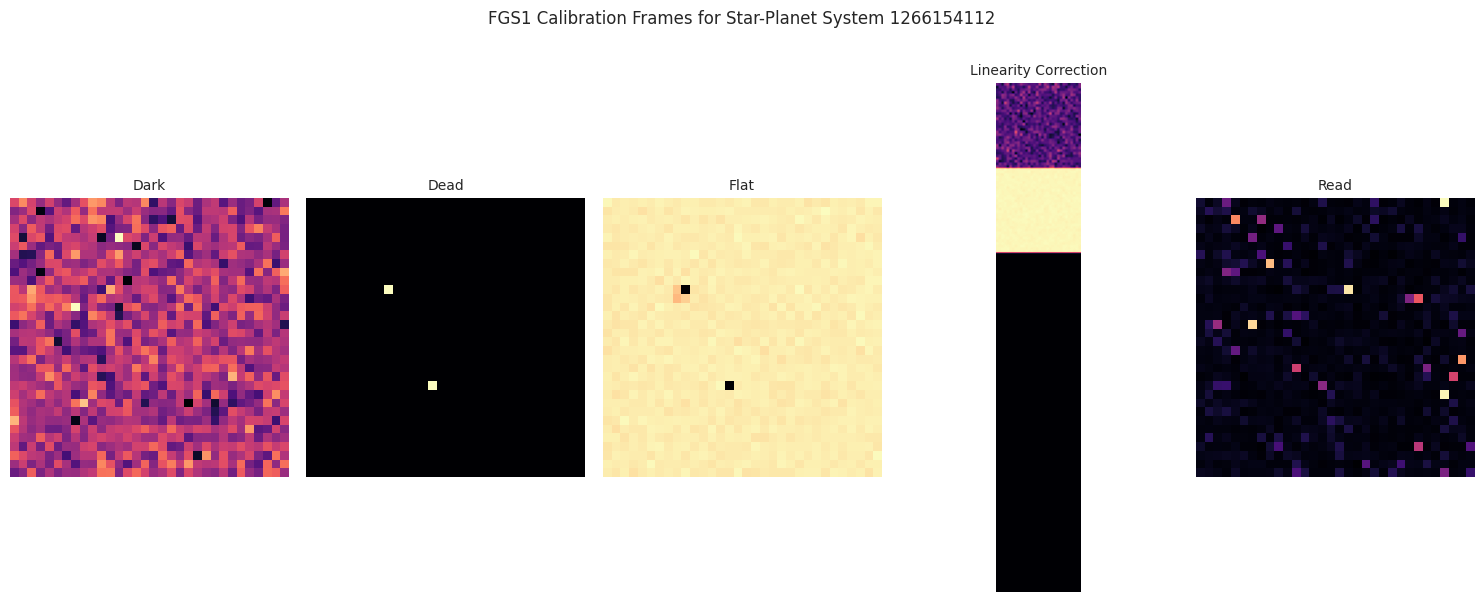

In [60]:
colormap = 'magma'
fig, axes = plt.subplots(1, 5, figsize=(15, 6))

titles = ['Dark', 'Dead', 'Flat', 'Linearity Correction', 'Read']
images = [df_fgs1_dark, df_fgs1_dead, df_fgs1_flat, df_fgs1_linear_corr, df_fgs1_read]

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img, cmap=colormap)
    ax.set_title(titles[i], fontsize=10)
    i += 1
    ax.axis('off')

fig.suptitle('FGS1 Calibration Frames for Star-Planet System ' + str(planet_id), y=1, fontsize=12)

plt.tight_layout()
plt.show()